In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import scipy 

In [2]:
data = pd.read_csv(r'C:\Users\NET\Desktop\health.csv')

In [3]:
data.head(2)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,2019-08-26,Ibuprofen,Inconclusive


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [5]:
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

In [7]:
data['Ages_category'] = data['Age'].apply(
    lambda x: 'teenages' if x < 20
              else 'twenties' if 20 <= x < 30
              else 'thirties' if 30 <= x < 40
              else 'forties' if 40 <= x < 50
              else 'fifties' if 50 <= x < 60
              else 'sixties' if 60 <= x < 70
              else 'seventies' if 70 <= x < 80
              else 'eighties'
)

In [8]:
data.head(2)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Ages_category
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,2024-02-02,Paracetamol,Normal,thirties
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,sixties


In [9]:
data.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
Ages_category         0
dtype: int64

###analys 

<function matplotlib.pyplot.show(close=None, block=None)>

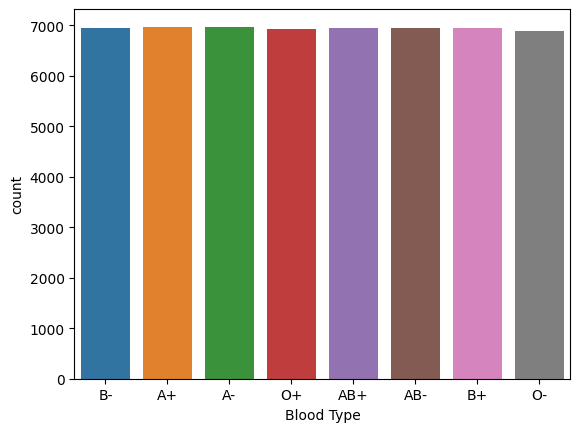

In [59]:
sns.countplot(x='Blood Type', data= data )
plt.show
 

<AxesSubplot: xlabel='Medication', ylabel='count'>

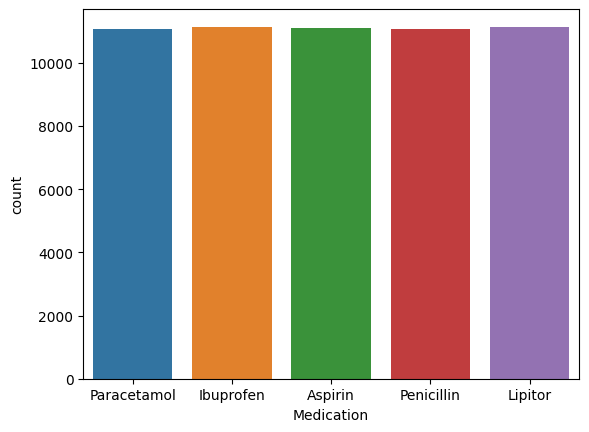

In [60]:
sns.countplot(data = data , x= 'Medication')

<AxesSubplot: xlabel='Admission Type', ylabel='count'>

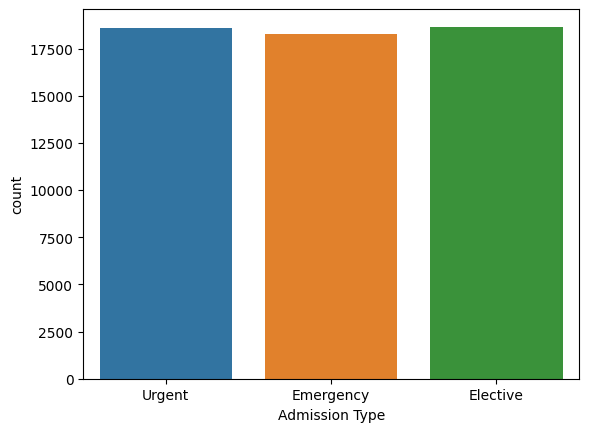

In [61]:
sns.countplot(data= data , x= 'Admission Type')

In [24]:
data.head(2)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Ages_category
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,2024-02-02,Paracetamol,Normal,thirties
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,sixties


In [36]:
data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Ages_category'],
      dtype='object')

In [39]:
from scipy.stats import chi2_contingency

def corr_chi2(data, columns):
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)): 
            Crosstab = pd.crosstab(data[columns[i]], data[columns[j]])
            stat, p, dof, expected = chi2_contingency(Crosstab)
            alpha = 0.05
            correlation = "correlated" if p < alpha else "not correlated"
            print(f"Columns {columns[i]} and {columns[j]} are {correlation} with p-value   {p:.4f}")

columns =['Gender', 'Blood Type', 'Medical Condition','Medication', 'Test Results', 'Ages_category']
corr_chi2(data, columns)


Columns Gender and Blood Type are correlated with p-value   0.0474
Columns Gender and Medical Condition are not correlated with p-value   0.9447
Columns Gender and Medication are not correlated with p-value   0.1770
Columns Gender and Test Results are not correlated with p-value   0.3645
Columns Gender and Ages_category are not correlated with p-value   0.5837
Columns Blood Type and Medical Condition are not correlated with p-value   0.4768
Columns Blood Type and Medication are not correlated with p-value   0.5191
Columns Blood Type and Test Results are not correlated with p-value   0.9076
Columns Blood Type and Ages_category are not correlated with p-value   0.4109
Columns Medical Condition and Medication are not correlated with p-value   0.4209
Columns Medical Condition and Test Results are not correlated with p-value   0.2098
Columns Medical Condition and Ages_category are not correlated with p-value   0.7242
Columns Medication and Test Results are not correlated with p-value   0.88

In [69]:
female = data.loc[data['Gender'] == 'Female']


In [65]:
def corr_chi2(female, columns):
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)): 
            Crosstab = pd.crosstab(female[columns[i]], female[columns[j]])
            stat, p, dof, expected = chi2_contingency(Crosstab)
            alpha = 0.05
            correlation = "correlated" if p < alpha else "not correlated"
            print(f"Columns {columns[i]} and {columns[j]} are {correlation} with p-value   {p:.4f}")

columns =['Blood Type', 'Medical Condition','Medication', 'Test Results', 'Ages_category']
corr_chi2(female, columns)

Columns Blood Type and Medical Condition are not correlated with p-value   0.2262
Columns Blood Type and Medication are not correlated with p-value   0.4436
Columns Blood Type and Test Results are not correlated with p-value   0.5334
Columns Blood Type and Ages_category are not correlated with p-value   0.6345
Columns Medical Condition and Medication are correlated with p-value   0.0476
Columns Medical Condition and Test Results are not correlated with p-value   0.6274
Columns Medical Condition and Ages_category are not correlated with p-value   0.4049
Columns Medication and Test Results are not correlated with p-value   0.5631
Columns Medication and Ages_category are not correlated with p-value   0.6371
Columns Test Results and Ages_category are not correlated with p-value   0.1444


In [67]:
male = data[data['Gender'] == 'Male']


In [68]:
def corr_chi2(male, columns):
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)): 
            Crosstab = pd.crosstab(male[columns[i]], male[columns[j]])
            stat, p, dof, expected = chi2_contingency(Crosstab)
            alpha = 0.05
            correlation = "correlated" if p < alpha else "not correlated"
            print(f"Columns {columns[i]} and {columns[j]} are {correlation} with p-value   {p:.4f}")

columns =['Blood Type', 'Medical Condition','Medication', 'Test Results', 'Ages_category']
corr_chi2(male, columns)

Columns Blood Type and Medical Condition are not correlated with p-value   0.5971
Columns Blood Type and Medication are not correlated with p-value   0.9053
Columns Blood Type and Test Results are not correlated with p-value   0.9624
Columns Blood Type and Ages_category are not correlated with p-value   0.1749
Columns Medical Condition and Medication are not correlated with p-value   0.5575
Columns Medical Condition and Test Results are not correlated with p-value   0.6167
Columns Medical Condition and Ages_category are not correlated with p-value   0.7329
Columns Medication and Test Results are not correlated with p-value   0.7223
Columns Medication and Ages_category are not correlated with p-value   0.2031
Columns Test Results and Ages_category are not correlated with p-value   0.7392


###conclusion about correlations


according to the global test about the correlations between the variables we find that only the GENDER and BLOOD TYPE whom have correlation, when we separted the gender from each other the outcome changed.
the data that contain only females info give us there's only one correlation represented by Medical Condition and Medication, in the otherwive for the male info the outcome show that there's no correlation at all.